In [1]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import sklearn.metrics
import sklearn.linear_model
import sklearn.model_selection
import sklearn.preprocessing

In [2]:
data = pd.read_csv(r"C:\\Users\\l.mora\\Downloads\\ElectricityTheftDetection_data\\data.csv", low_memory=False)

print(f"Total number of columns in the CSV:\t{len(data.columns)}")
print(f"Total number of instances:\t{len(data)}")
print(f"Column names:\n\t- {";\n\t- ".join(list(data.columns))}.")

Total number of columns in the CSV:	1036
Total number of instances:	42372
Column names:
	- CONS_NO;
	- FLAG;
	- 2014/1/1;
	- 2014/1/10;
	- 2014/1/11;
	- 2014/1/12;
	- 2014/1/13;
	- 2014/1/14;
	- 2014/1/15;
	- 2014/1/16;
	- 2014/1/17;
	- 2014/1/18;
	- 2014/1/19;
	- 2014/1/2;
	- 2014/1/20;
	- 2014/1/21;
	- 2014/1/22;
	- 2014/1/23;
	- 2014/1/24;
	- 2014/1/25;
	- 2014/1/26;
	- 2014/1/27;
	- 2014/1/28;
	- 2014/1/29;
	- 2014/1/3;
	- 2014/1/30;
	- 2014/1/31;
	- 2014/1/4;
	- 2014/1/5;
	- 2014/1/6;
	- 2014/1/7;
	- 2014/1/8;
	- 2014/1/9;
	- 2014/10/1;
	- 2014/10/10;
	- 2014/10/11;
	- 2014/10/12;
	- 2014/10/13;
	- 2014/10/14;
	- 2014/10/15;
	- 2014/10/16;
	- 2014/10/17;
	- 2014/10/18;
	- 2014/10/19;
	- 2014/10/2;
	- 2014/10/20;
	- 2014/10/21;
	- 2014/10/22;
	- 2014/10/23;
	- 2014/10/24;
	- 2014/10/25;
	- 2014/10/26;
	- 2014/10/27;
	- 2014/10/28;
	- 2014/10/29;
	- 2014/10/3;
	- 2014/10/30;
	- 2014/10/31;
	- 2014/10/4;
	- 2014/10/5;
	- 2014/10/6;
	- 2014/10/7;
	- 2014/10/8;
	- 2014/10/9;
	- 2014/11

In [3]:
# New column formatting
date_names = data.iloc[:,2:].columns.map(
    lambda col: datetime.strptime(col, "%Y/%m/%d").strftime("%Y%m%d"))
new_col_names = pd.Index(["CONS_NO", "FLAG"]).append(date_names)
data.columns = new_col_names

# Alphabetical sorting (by date) of columns
data = data.reindex(sorted(data.columns), axis=1)

print(f"New column names:\n\t- {";\n\t- ".join(list(data.columns))}.")

New column names:
	- 20140101;
	- 20140102;
	- 20140103;
	- 20140104;
	- 20140105;
	- 20140106;
	- 20140107;
	- 20140108;
	- 20140109;
	- 20140110;
	- 20140111;
	- 20140112;
	- 20140113;
	- 20140114;
	- 20140115;
	- 20140116;
	- 20140117;
	- 20140118;
	- 20140119;
	- 20140120;
	- 20140121;
	- 20140122;
	- 20140123;
	- 20140124;
	- 20140125;
	- 20140126;
	- 20140127;
	- 20140128;
	- 20140129;
	- 20140130;
	- 20140131;
	- 20140201;
	- 20140202;
	- 20140203;
	- 20140204;
	- 20140205;
	- 20140206;
	- 20140207;
	- 20140208;
	- 20140209;
	- 20140210;
	- 20140211;
	- 20140212;
	- 20140213;
	- 20140214;
	- 20140215;
	- 20140216;
	- 20140217;
	- 20140218;
	- 20140219;
	- 20140220;
	- 20140221;
	- 20140222;
	- 20140223;
	- 20140224;
	- 20140225;
	- 20140226;
	- 20140227;
	- 20140228;
	- 20140301;
	- 20140302;
	- 20140303;
	- 20140304;
	- 20140305;
	- 20140306;
	- 20140307;
	- 20140308;
	- 20140309;
	- 20140310;
	- 20140311;
	- 20140312;
	- 20140313;
	- 20140314;
	- 20140315;
	- 20140316;
	- 2014

In [4]:
target = 'FLAG'
target_labels = ["No Fraud", "Fraud"]

print(f"Target variable:\t{target}")

Target variable:	FLAG


In [5]:
data.interpolate(method='polynomial', order=2, axis=0, inplace=True)
data.fillna(0, axis=0, inplace=True)

C:\Users\l.mora\AppData\Local\Temp\ipykernel_10868\4141348559.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='polynomial', order=2, axis=0, inplace=True)


In [36]:
def filter_client_data(data: pd.DataFrame, client_id: str) -> pd.Series:
    """Filter data for a specific client."""
    return data[data['CONS_NO'] == client_id]

def calculate_daily_average(df):
    """Calculate the daily average of consumption."""
    daily_avg = df.drop(columns=['CONS_NO', 'FLAG'], errors="ignore").mean(axis=0)
    return pd.DataFrame({"date": daily_avg.index, "avg": daily_avg.values})

def plot_comparison(
        avg_data: pd.DataFrame,
        honest_data: pd.DataFrame,
        fraudulent_data: pd.DataFrame
    ) -> None:
    """Plot the comparison of average, honest, and fraudulent customer data."""
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=avg_data, x='date', y='avg',
        color='#073763', label='Daily AVG', linewidth=1.5)
    sns.lineplot(
        data=honest_data, x='date', y='avg',
        color='#3e9c15', label='Honest Customer', linewidth=1.2)
    sns.lineplot(
        data=fraudulent_data, x='date', y='avg',
        color='#cc0000', label='Fraudulent Customer', linewidth=1.2, linestyle='--')

    n_days = len(avg_data)
    plt.xticks(range(1, n_days, int(n_days*.2)),)
            #    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid()
    plt.legend(loc='best', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.title('Consumption Discrepancy (Fraudulent and Honest)')
    plt.suptitle('Consumption Comparison Between Two Random Customers')
    plt.xlabel('Time')
    plt.ylabel('Consumption')
    plt.show()

def comparison(
        df: pd.DataFrame,
        start_date: str = '20140101',
        end_date: str = '20161031'
    ):
    """
    Compare the monthly consumption between a fraudulent and
    non-fraudulent client, alongside the overall monthly average.
    """
    start_index = df.columns.get_loc(start_date)
    end_index = df.columns.get_loc(end_date)

    # Filter data according to the specified interval [start_date:end_date)
    filtered_consumption = df.iloc[:, start_index:end_index]
    data = pd.concat([df[['CONS_NO', 'FLAG']], filtered_consumption], axis=1)

    # Separate fraudulent and non-fraudulent clients based on FLAG
    f_clients: np.ndarray = data[data['FLAG'] == 1]['CONS_NO'].unique()
    h_clients: np.ndarray = data[data['FLAG'] == 0]['CONS_NO'].unique()

    if len(f_clients) == 0 or len(h_clients) == 0:
        raise ValueError("No sufficient data for fraudulent or non-fraudulent clients in the dataset.")

    # Calculate daily average for all clients
    daily_avg_data = calculate_daily_average(filtered_consumption)

    # Calculate daily average for a random honest client
    h_client_id = np.random.choice(h_clients)
    h_data = filter_client_data(data, h_client_id)
    h_daily_avg_data = calculate_daily_average(h_data)

    # Calculate daily average for a random fraudulent client
    f_client_id = np.random.choice(f_clients)
    f_data = filter_client_data(data, f_client_id)
    f_daily_avg_data = calculate_daily_average(f_data)

    # Plot the comparison
    plot_comparison(daily_avg_data, h_daily_avg_data, f_daily_avg_data)

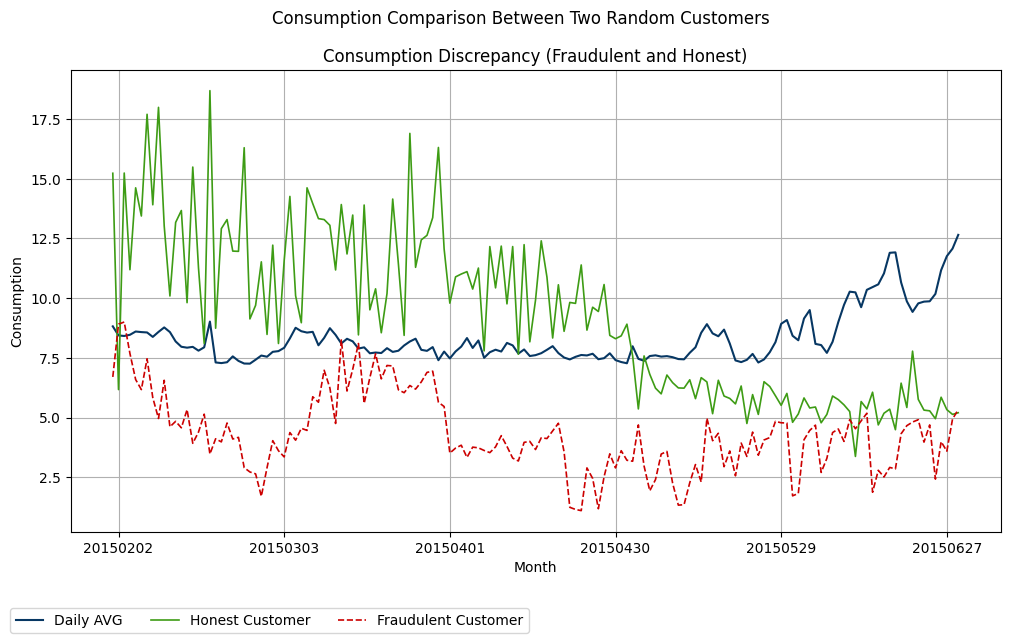

In [35]:
comparison(data, "20150201", "20150630")

In [49]:
def plot_total_consumption_comparison(
        df: pd.DataFrame,
        start_date: str = '20140101',
        end_date: str = '20161031'
    ) -> None:
    """
    Generate a graph comparing the total fraudulent consumption 
    against the total non-fraudulent consumption for a specific counter type.
    """
    start_index = df.columns.get_loc(start_date)
    end_index = df.columns.get_loc(end_date)

    # Filter data according to the specified interval [start_date:end_date)
    filtered_consumption = df.iloc[:, start_index:end_index]
    data = pd.concat([df[['FLAG']], filtered_consumption], axis=1)

    # Group by FLAG to calculate total consumption for fraudulent (1) and non-fraudulent (0) clients
    total_consumption = filtered_consumption.sum().reset_index()
    total_consumption_by_flag = data.groupby('FLAG').sum().reset_index()

    # Map flag values to meaningful labels
    total_consumption_by_flag['FLAG'] = total_consumption_by_flag['FLAG'].map(
        {0: 'Non-Fraudulent', 1: 'Fraudulent'})

    # Plot the total consumption comparison
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=total_consumption_by_flag,
        x='FLAG',
        y='Total Consumption',
        palette=['#3e9c15', '#cc0000']
    )
    plt.title(f'Total Consumption Comparison')
    plt.xlabel('Client Type')
    plt.ylabel('Total Consumption')
    plt.show()

In [50]:
plot_total_consumption_comparison(data)

ValueError: Could not interpret value `Total Consumption` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

## Training

In [25]:
train, test = sklearn.model_selection.train_test_split(data, test_size=.2, random_state=42, shuffle=True)

print(f"Training set instances:\t\t{len(train)}")
print(f"Validation set instances:\t{len(test)}")

Training set instances:		33897
Validation set instances:	8475


In [32]:
x_train = train.to_numpy()[:, 2:]
y_train = train[target].astype("int").astype("category")

In [35]:
x_test = test.to_numpy()[:, 2:]
y_test = test[target].astype("int").astype("category")

In [33]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)

In [34]:
clf = sklearn.linear_model.Perceptron(
    max_iter=3000,
    random_state=42
)
fitted_clf = clf.fit(scaled_x_train, y_train)

## Evaluation

In [37]:
y_pred = fitted_clf.predict(scaler.transform(x_test))
results = pd.DataFrame({"EXPECTED": y_test, "PREDICTED": y_pred})

In [38]:
results.head(15)

,EXPECTED,PREDICTED
15232,0,0
26804,0,0
28553,0,0
39245,0,0
38858,0,0
8869,0,1
12760,0,1
7524,0,1
30735,0,0
15601,0,0


In [39]:
fitted_clf.score(x_train, y_train)

0.14912824143729533

In [40]:
fitted_clf.score(x_test, y_test)

0.1487905604719764

In [41]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

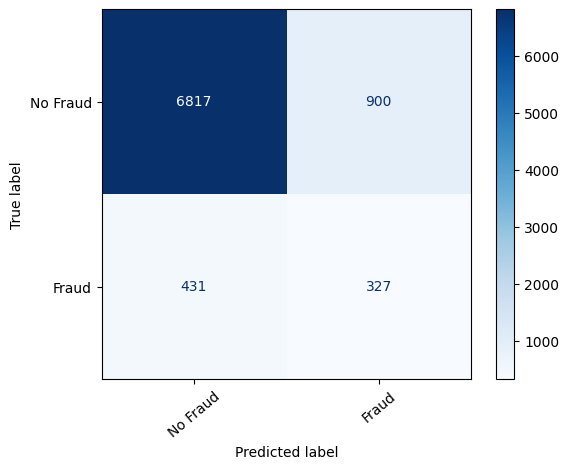

In [42]:
cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=target_labels)

cm_display.plot(
    cmap=plt.cm.Blues, # type: ignore
    xticks_rotation=40
)
plt.show()

In [43]:
avg_metrics = {
    "accuracy": sklearn.metrics.accuracy_score(y_test, y_pred),
    "precision": sklearn.metrics.precision_score(
        y_test, y_pred,
        labels=target_labels),
    "sensitivity": sklearn.metrics.recall_score(
        y_test, y_pred,
        labels=target_labels),
    "f1_score": sklearn.metrics.f1_score(
        y_test, y_pred,
        labels=target_labels)
}

In [44]:
avg_metrics

{'accuracy': 0.8429498525073746,
 'precision': 0.2665036674816626,
 'sensitivity': 0.4313984168865435,
 'f1_score': 0.3294710327455919}

In [45]:
print(sklearn.metrics.classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    No Fraud       0.94      0.88      0.91      7717
       Fraud       0.27      0.43      0.33       758

    accuracy                           0.84      8475
   macro avg       0.60      0.66      0.62      8475
weighted avg       0.88      0.84      0.86      8475

